In [ ]:
!pip install pyspark
#install Pyspark If not Installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 28.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=8c8be3b002d444171ab1251e56b7aa486789515e88ec2c183850c9d09b8ad542
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
#import All neccsesary libs
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

In [ ]:
import io
import pyspark
from pyspark.sql import SparkSession
#create SparkSession & load the data
spark = SparkSession.builder.appName('model').getOrCreate()
df = spark.read.csv('DOT_Traffic_Speeds_NBE.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- SPEED: double (nullable = true)
 |-- TRAVEL_TIME: integer (nullable = true)
 |-- STATUS: integer (nullable = true)
 |-- DATA_AS_OF: string (nullable = true)
 |-- LINK_ID: integer (nullable = true)
 |-- LINK_POINTS: string (nullable = true)
 |-- ENCODED_POLY_LINE: string (nullable = true)
 |-- ENCODED_POLY_LINE_LVLS: string (nullable = true)
 |-- OWNER: string (nullable = true)
 |-- TRANSCOM_ID: integer (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- LINK_NAME: string (nullable = true)



In [ ]:
#Drop un wanted Features
df=df.drop('LINK_ID','LINK_POINTS','ENCODED_POLY_LINE','ENCODED_POLY_LINE_LVLS','OWNER','TRANSCOM_ID','BOROUGH','ID')


In [ ]:
df.printSchema()
from pyspark.sql import functions as F


root
 |-- SPEED: double (nullable = true)
 |-- TRAVEL_TIME: integer (nullable = true)
 |-- STATUS: integer (nullable = true)
 |-- DATA_AS_OF: string (nullable = true)
 |-- LINK_NAME: string (nullable = true)



In [ ]:
df.show()

+-----+-----------+------+--------------+--------------------+
|SPEED|TRAVEL_TIME|STATUS|    DATA_AS_OF|           LINK_NAME|
+-----+-----------+------+--------------+--------------------+
|52.82|         67|     0|5/5/2017 10:06|HRP N LAFAYETTE A...|
|24.85|        289|     0|5/5/2017 10:06|BQE N Atlantic Av...|
|54.06|         71|     0| 5/5/2017 9:51|HRP N LAFAYETTE A...|
| 26.1|        274|     0| 5/5/2017 9:51|BQE N Atlantic Av...|
|52.82|         67|     0|5/5/2017 10:11|HRP N LAFAYETTE A...|
|24.23|        295|     0|5/5/2017 10:11|BQE N Atlantic Av...|
|52.82|         72|     0|5/5/2017 19:16|HRP N LAFAYETTE A...|
|54.06|         66|     0|5/5/2017 10:16|HRP N LAFAYETTE A...|
|24.23|        293|     0|5/5/2017 10:16|BQE N Atlantic Av...|
|11.81|        590|     0|5/5/2017 19:16|BQE N Atlantic Av...|
|49.71|         74|     0|5/5/2017 10:21|HRP N LAFAYETTE A...|
|22.99|        312|     0|5/5/2017 10:21|BQE N Atlantic Av...|
|52.82|         69|     0|5/5/2017 19:21|HRP N LAFAYETT

In [ ]:
label = df['TRAVEL_TIME']
from pyspark.sql import functions as F
import datetime
import pandas as pd
from pyspark.sql.functions import hour
from pyspark.sql.functions import minute
from pyspark.sql.functions import dayofweek

In [ ]:
from pyspark.sql import functions as F
# Convert the Spark DataFrame to Pandas DataFrame
df=df.toPandas()

In [ ]:
import datetime
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Convert the String datatime to datetime format
s = pd.to_datetime(df.DATA_AS_OF.astype(str))

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
#Extract Hour & Minute & Day of Week
df['hr']=s.dt.hour
df['min']=s.dt.minute
df['day'] =s.dt.weekday

In [ ]:
#Encode the Link_name to Numeric format to feed to the model
le = LabelEncoder()
df['LINK_NAME'] = le.fit_transform(df['LINK_NAME'])
y=df['TRAVEL_TIME']
df=df.drop(['TRAVEL_TIME'],axis=1)
# Extract the Travel-time 


In [ ]:
# drop the data_as_of 
df=df.drop(['DATA_AS_OF'],axis=1)

In [ ]:
df=df.drop(['STATUS'],axis=1)

In [ ]:
df[:3]

,SPEED,LINK_NAME,hr,min,day
0,52.82,1,10,6,4
1,24.85,0,10,6,4
2,54.06,1,9,51,4


In [ ]:
df = spark.createDataFrame(df) 

In [ ]:
df=df1

In [ ]:

df=df.dropna(subset=['rolling_Mean'	,'rolling_Max',	'rolling_Min'], how='any')
label = df['TRAVEL_TIME']
y=df['TRAVEL_TIME']
df=df.drop(['TRAVEL_TIME'],axis=1)



AnalysisException: ignored

# Re-Convert the Pandas DataFrame to Spark DataFrame
df = spark.createDataFrame(df)

In [ ]:
# Vectorize the Features
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler().setInputCols(df.columns[:]).setOutputCol('features').setHandleInvalid("keep")

In [ ]:
df = assembler.transform(df)

In [ ]:
df1 = df.toPandas()

In [ ]:
# Convert the Back to Pandas & extract labels, remove duplicates 
df = df.toPandas()
features = df['features']
features_df = pd.DataFrame(data = {'features': features})
features_df = features_df.loc[~features_df.index.duplicated(), :]
label_df = pd.DataFrame(data = {'label': y})
label_df = label_df.loc[~label_df.index.duplicated(), :]
transportation_df = pd.concat([features_df, label_df], axis= 1).dropna()  
transportation_df.head()

In [ ]:
# Split the data in Train/Test(80% & 20&) respectively 
transportation_df = spark.createDataFrame(transportation_df)
trainSet, testSet, valid = transportation_df.randomSplit([0.8, 0.1,0.1])

In [ ]:
valid.select('label').show(10)

+-----+
|label|
+-----+
|  357|
|  238|
|  193|
|  545|
|  444|
|  437|
|  419|
|  415|
|  394|
|  379|
+-----+
only showing top 10 rows



In [ ]:
#import Desicion Tree Regressor Model & fit to the Train Dataset
from pyspark.ml.regression import DecisionTreeRegressor
dr = DecisionTreeRegressor(labelCol="label", featuresCol="features")  
dr_model = dr.fit(trainSet)

In [ ]:
#import Desicion Tree Regressor Model & fit to the Train Dataset
from pyspark.ml.regression import DecisionTreeRegressor
dr_tunned = DecisionTreeRegressor(labelCol="label", featuresCol="features",maxDepth=30,minWeightFractionPerNode=0,minInstancesPerNode=1,maxBins=32,minInfoGain=0.01)  
dr_model_tunned = dr_tunned.fit(trainSet)

In [ ]:
predictions_valid = dr_model.transform(valid)
predictions_valid_tunned = dr_model_tunned.transform(valid)

In [ ]:
label_vis=transportation_df.select('label').toPandas()
feat_vis=transportation_df.select('features').toPandas()


In [ ]:
predictions = dr_model.transform(testSet)
predictions.show(10) 
predictions_tunned = dr_model_tunned.transform(testSet)
predictions_tunned.show(10) 

+--------------------+-----+------------------+
|            features|label|        prediction|
+--------------------+-----+------------------+
|(5,[0,2],[19.88,2...|  357| 312.4939212735625|
|(5,[0,2],[29.2,21...|  245|241.49432807919445|
|(5,[0,2],[39.76,2...|  181|173.28514130896727|
|(5,[0,3],[9.32,28...|  731| 808.8022406234778|
|(5,[0,3],[11.8,24...|  591| 465.6168386555605|
|(5,[0,3],[11.8,32...|  610| 465.6168386555605|
|(5,[0,3],[12.42,3...|  565| 465.6168386555605|
|(5,[0,3],[16.77,9...|  427| 465.6168386555605|
|(5,[0,3],[17.39,3...|  412| 465.6168386555605|
|(5,[0,3],[18.01,9...|  388| 312.4939212735625|
+--------------------+-----+------------------+
only showing top 10 rows

+--------------------+-----+-----------------+
|            features|label|       prediction|
+--------------------+-----+-----------------+
|(5,[0,2],[19.88,2...|  357|            355.0|
|(5,[0,2],[29.2,21...|  245|            243.0|
|(5,[0,2],[39.76,2...|  181|180.1188675927554|
|(5,[0,3],[9.32,28..

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics, RankingMetrics
rmse = RegressionEvaluator(labelCol='label',predictionCol='prediction',metricName='rmse') 
pred=predictions_valid.select('prediction').toPandas()
label=predictions_valid.select('label').toPandas()
pred=pred.round(2)
pred=pred.to_numpy()
label=label.to_numpy()

pred_tunned=predictions_valid_tunned.select('prediction').toPandas()
label_tunned=predictions_valid_tunned.select('label').toPandas()
pred_tunned=pred_tunned.round(2)
pred_tunned=pred_tunned.to_numpy()
label_tunned=label_tunned.to_numpy()

In [ ]:
pred_tst=predictions.select('prediction').toPandas()
label_tst=predictions.select('label').toPandas()
pred_tst=pred_tst.round(2)
pred_tst=pred_tst.to_numpy()
label_tst=label_tst.to_numpy()

pred_tst_tunned=predictions_tunned.select('prediction').toPandas()
label_tst_tunned=predictions_tunned.select('label').toPandas()
pred_tst_tunned=pred_tst_tunned.round(2)
pred_tst_tunned=pred_tst_tunned.to_numpy()
label_tst_tunned=label_tst_tunned.to_numpy()

In [ ]:
from sklearn import metrics
import numpy as np
print('Before Tunned')
print('Test Data Error Measurements')
print(' MAE:', metrics.mean_absolute_error(label_tst,pred_tst))
print('RMSE:', np.sqrt(metrics.mean_squared_error(label_tst, pred_tst))) 
print("")
print('Validation Data Error Measurements')
print('MAE:', metrics.mean_absolute_error(label,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(label, pred))) 


Before Tunned
Test Data Error Measurements
 MAE: 20.904914616967158
RMSE: 73.7257785654161

Validation Data Error Measurements
MAE: 20.882981096523213
RMSE: 68.85854988334005


In [ ]:
print('After Tunned')
print('Test Data Error Measurements')
print(' MAE:', metrics.mean_absolute_error(label_tunned,pred_tunned))
print('RMSE:', np.sqrt(metrics.mean_squared_error(label_tunned, pred_tunned))) 
print("")
print('Validation Data Error Measurements')
print('MAE:', metrics.mean_absolute_error(label_tst_tunned,pred_tst_tunned))
print('RMSE:', np.sqrt(metrics.mean_squared_error(label_tst_tunned, pred_tst_tunned))) 


After Tunned
Test Data Error Measurements
 MAE: 5.4232275711159765
RMSE: 39.03447968404535

Validation Data Error Measurements
MAE: 5.419382100473281
RMSE: 32.793672432357155


<Figure size 432x288 with 0 Axes>

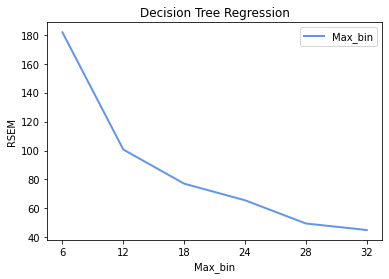

In [ ]:
# Plot the results
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
depth=['6','12','18','24','28','32']
regr_2 = DecisionTreeRegressor(labelCol="label", featuresCol="features",maxDepth=6,minWeightFractionPerNode=0,minInstancesPerNode=1,minInfoGain=0.01,maxBins=6) 
regr_3 = DecisionTreeRegressor(labelCol="label", featuresCol="features",maxDepth=6,minWeightFractionPerNode=0,minInstancesPerNode=1,minInfoGain=0.01,maxBins=8) 
regr_4 = DecisionTreeRegressor(labelCol="label", featuresCol="features",maxDepth=6,minWeightFractionPerNode=0,minInstancesPerNode=1,minInfoGain=0.01,maxBins=10) 
regr_5 = DecisionTreeRegressor(labelCol="label", featuresCol="features",maxDepth=6,minWeightFractionPerNode=0,minInstancesPerNode=1,minInfoGain=0.01,maxBins=15) 
regr_6 = DecisionTreeRegressor(labelCol="label", featuresCol="features",maxDepth=6,minWeightFractionPerNode=0,minInstancesPerNode=1,minInfoGain=0.01,maxBins=24) 
regr_7 = DecisionTreeRegressor(labelCol="label", featuresCol="features",maxDepth=6,minWeightFractionPerNode=0,minInstancesPerNode=1,minInfoGain=0.01,maxBins=32) 
regr_2=regr_2.fit(trainSet)
regr_3=regr_3.fit(trainSet)
regr_4=regr_4.fit(trainSet)
regr_5=regr_5.fit(trainSet)
regr_6=regr_6.fit(trainSet)
regr_7=regr_7.fit(trainSet)

y2=regr_2.transform(valid)
y2_rmse = RegressionEvaluator(labelCol='label',predictionCol='prediction',metricName='rmse')
y2_rmse=y2_rmse.evaluate(y2)

y3=regr_3.transform(valid)
y3_rmse= RegressionEvaluator(labelCol='label',predictionCol='prediction',metricName='rmse')
y3_rmse=y3_rmse.evaluate(y3)

y4=regr_4.transform(valid)
y4_rmse=RegressionEvaluator(labelCol='label',predictionCol='prediction',metricName='rmse')
y4_rmse=y4_rmse.evaluate(y4)

y5=regr_5.transform(valid)
y5_rmse=RegressionEvaluator(labelCol='label',predictionCol='prediction',metricName='rmse')
y5_rmse=y5_rmse.evaluate(y5)

y6=regr_6.transform(valid)
y6_rmse=RegressionEvaluator(labelCol='label',predictionCol='prediction',metricName='rmse')
y6_rmse=y6_rmse.evaluate(y6)

y7=regr_7.transform(valid)
y7_rmse=RegressionEvaluator(labelCol='label',predictionCol='prediction',metricName='rmse')
y7_rmse=y7_rmse.evaluate(y7)

rsme=[y2_rmse,y3_rmse,y4_rmse,y5_rmse,y6_rmse,y7_rmse]
plt.figure()
plt.plot( depth,rsme, color="cornflowerblue", label="Max_bin", linewidth=2)

plt.xlabel("Max_bin")
plt.ylabel("RSEM")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
from pyspark.ml.regression import LinearRegression
lr=LinearRegression(labelCol="label", featuresCol="features",predictionCol='prediction') 
lr_model = lr.fit(trainSet)
prediction = lr_model.transform(valid)
prediction.select('label','prediction').show(10)
#lrModel = (featuresCol = 'features', labelCol='label')

+-----+------------------+
|label|        prediction|
+-----+------------------+
|  201| 217.4365928988505|
|  591| 394.3836206042819|
|  567|  390.524816278452|
|  545| 384.6156884760044|
|  425| 355.6081592861902|
|  417| 356.5867227636669|
|  383| 343.2096552437457|
|  355| 332.7427492029849|
|  345| 327.7655866171816|
|  349|328.04517618217494|
+-----+------------------+
only showing top 10 rows



In [ ]:
trainSet.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(5,[0,2],[9.32,21...|  763|
|(5,[0,2],[13.04,2...|  542|
|(5,[0,2],[17.39,2...|  412|
|(5,[0,2],[18.01,1...|  401|
|(5,[0,2],[18.64,2...|  385|
+--------------------+-----+
only showing top 5 rows



In [ ]:
pred=prediction.select('prediction').toPandas()
label=prediction.select('label').toPandas()
pred=pred.to_numpy()
label=label.to_numpy()
print('MAE:', metrics.mean_absolute_error(label,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(label, pred)))

MAE: 75.51089393134326
RMSE: 196.64601939396536


In [ ]:
from pyspark.ml.regression import GBTRegressor
gf = GBTRegressor(labelCol="label",featuresCol="features",minInstancesPerNode=1,maxIter=200,subsamplingRate=1,maxDepth=15,stepSize=0.1,minWeightFractionPerNode =0.0001) 
gf_model = gf.fit(trainSet)
predictions = gf_model.transform(valid)
predictions.select('label','prediction').show(10)

from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics, RankingMetrics
rmse = RegressionEvaluator(labelCol='label',predictionCol='prediction',metricName='rmse') 


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.8/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
pred_gbt_test=predictions.select('prediction').toPandas()
label_tst_tunned=predictions.select('label').toPandas()
pred_gbt_test=pred_tst_tunned.round(2)
pred_gbt_test=pred_tst_tunned.to_numpy()
label_tst_tunned=label_tst_tunned.to_numpy()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_gbt_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_gbt_test)))  
print('MAPE',np.mean(np.abs((pred_gbt_test - y_test)/pred_gbt_test))*100)



MAE: 2.956309186722893
RMSE: 17.00582738446551
MAPE 4.755616431042562


In [ ]:
from pyspark.ml.regression import GBTRegressor
gf = GBTRegressor(labelCol="label",featuresCol="features") 
gf_model = gf.fit(trainSet)

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder


In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[dr])
pipeline.write().overwrite().save('pipeline')
pipelineModel = Pipeline.load('pipeline')

In [ ]:
# Define all the hyper parameters and provide the list of values to test the model's performance
paramGrid = ParamGridBuilder().addGrid(dr_model.maxDepth, [6,3,4]).addGrid(dr_model.minInstancesPerNode, [1,2]).addGrid(dr_model.maxBins, [32,100]).addGrid(dr_model.minWeightFractionPerNode, [0,0.0001,0.1]).build()
# 
tvs = CrossValidator(estimator=pipelineModel,estimatorParamMaps=paramGrid,evaluator=RegressionEvaluator(),numFolds=2)  
# Run TrainValidationSplit, and choose the best set of parameters.
model = tvs.fit(transportation_df)

In [ ]:
# Check the perfromance metrics(RMSE) of all the models 
model.avgMetrics

[83.67557417955037,
 83.64027041726268,
 189.3235417563783,
 43.63105201612619,
 44.74204325294191,
 189.26763023843097,
 83.67557417955037,
 83.64027041726268,
 189.3235417563783,
 43.63105201612619,
 44.74204325294191,
 189.26763023843097,
 106.64633550263558,
 106.64633550263558,
 189.33846135563175,
 106.6893146067874,
 106.6893146067874,
 189.28345509400455,
 106.64633550263558,
 106.64633550263558,
 189.33846135563175,
 106.6893146067874,
 106.6893146067874,
 189.28345509400455,
 91.53041556583361,
 91.53041556583361,
 189.3235417563783,
 73.18788319265579,
 73.18788319265579,
 189.26763023843097,
 91.53041556583361,
 91.53041556583361,
 189.3235417563783,
 73.18788319265579,
 73.18788319265579,
 189.26763023843097]

In [ ]:
# Extract paramater values of best performing Model (least RMSE value)
model.getEstimatorParamMaps()[ np.argmin(model.avgMetrics) ]

{Param(parent='DecisionTreeRegressor_824772fb6afa', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 6,
 Param(parent='DecisionTreeRegressor_824772fb6afa', name='minInstancesPerNode', doc='Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1.'): 1,
 Param(parent='DecisionTreeRegressor_824772fb6afa', name='minWeightFractionPerNode', doc='Minimum fraction of the weighted sample count that each child must have after split. If a split causes the fraction of the total weight in the left or right child to be less than minWeightFractionPerNode, the split will be discarded as invalid. Should be in interval [0.0, 0.5).'): 0.0,
 Param(parent='DecisionTreeRegressor_824772fb6afa', name='maxBins', doc='Max number of bins for discretizing cont

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[gf])
pipeline.write().overwrite().save('pipeline') 
pipelineModel = Pipeline.load('pipeline')


In [ ]:
pipelineModel

Pipeline_83da666e942a

In [ ]:
paramGridx = ParamGridBuilder().addGrid(gf_model.minInstancesPerNode, [1,2]).addGrid(gf_model.subsamplingRate, [0.1,0.01]).addGrid(gf_model.maxIter, [10,50,100,200]).addGrid(gf_model.minInfoGain, [0.01,0.1,0.5,0.2]).build()
# In this case the estimator is simply the linear regression.
# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
tvs_lr = CrossValidator(estimator=pipelineModel,estimatorParamMaps=paramGridx,evaluator=RegressionEvaluator(),numFolds=2)
# Run TrainValidationSplit, and choose the best set of parameters.
model_lr = tvs_lr.fit(trainSet)

In [ ]:
model_lr.avgMetrics

[
35.41625402618834
41.87965369376272
49.81532818435485
37.18914138132543
29.52503295845031
22.04618412364564
55.46871903685934
50.94183476182967
51.01247616813498
34.67189137958426
27.78126975131472
17.18456138795134
19.17561389468651
20.95281647132583
16.27115838319457
14.8694175855396
12.697190529189633
18.31874048236473
]


In [ ]:
model_lr.getEstimatorParamMaps()[ np.argmin(model_lr.avgMetrics) ]


{Param(parent='GBTRegressor_6cc4b5687350', name='minInstancesPerNode', doc='Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1.'): 1,
 Param(parent='GBTRegressor_6cc4b5687350', name='subsamplingRate', doc='Fraction of the training data used for learning each decision tree, in range (0, 1].'): 1.0,
 Param(parent='GBTRegressor_6cc4b5687350', name='maxIter', doc='max number of iterations (>= 0).'): 200}

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator


In [ ]:
# Saving the Model for future 
gf_model.save( "/usr/colab/bin/model1") 

In [ ]:
#Zipping the model files
!zip -r /usr/colab/bin/model.zip /usr/colab/bin/model